In [ ]:
!pip install keras
!pip install seaborn
!pip install autokeras
!pip install --upgrade keras-tuner

## Experimenting with differents prediction models

Now that the datasets are merged together, we can "feed" it to some models that could be able to predict one of the following features :
- ACCI
- AUTR
- INCN
- INCU
- SUAP
- **ope_total** (the sum of all the previous attributes)

However, before doing so, we decided to pass the week number of each row into a one-hot-encoder (we used `pd.get_dummies` more specifically). We could have left this feature aside and only base our predictions on medical-conditions data, weater data, and vacations data, but specific week numbers can be useful to predict the number of operations done by the firefighters. Indeed, specific weeks can hold a meaning and the number of total operations can be correlated to it. For example : 
  - there is a little bit more accidents on "special" days, such as New Year's Eve or National Day.
  - suicides rates are at their maximum at the end of the year
  - epidemics usually occurs at the same period of the year (see the "visualization" part of the `part_1__merge_dataset.ipynb` file).

---

As a side note:  
This is a **regression problem** as we want to predict a discrete value that usually ranges from 1160 to 3763 (for `ope_total`). We experimented with different models and techniques


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('merged_data.csv', sep='\t', encoding='utf-8')

try:
    df.drop('Unnamed: 0', axis=1, inplace=True)
except:
    pass

# create a week column
df['week_no'] = df['yearweek'].astype(str).str[-2:]

df = pd.concat(
    [df, pd.get_dummies(df['week_no'], prefix='wk')],
    axis=1
)

display(
    df.head(15),
    df.tail(15),
    df.describe()
)

,yearweek,ACCI,AUTR,INCN,INCU,SUAP,ope_total,inc_grippe,inc_diarrhee,inc_varicelle,...,wk_43,wk_44,wk_45,wk_46,wk_47,wk_48,wk_49,wk_50,wk_51,wk_52
0,201001,81.0,232.0,0.0,129.0,1397.0,1839.0,10207,42889,3735,...,0,0,0,0,0,0,0,0,0,0
1,201002,84.0,163.0,1.0,144.0,1383.0,1775.0,9134,61576,3120,...,0,0,0,0,0,0,0,0,0,0
2,201003,74.0,107.0,0.0,123.0,1192.0,1496.0,4816,60448,1420,...,0,0,0,0,0,0,0,0,0,0
3,201004,78.0,105.0,0.0,130.0,1316.0,1629.0,4348,61601,1284,...,0,0,0,0,0,0,0,0,0,0
4,201005,84.0,111.0,0.0,117.0,1341.0,1653.0,2888,47258,6835,...,0,0,0,0,0,0,0,0,0,0
5,201006,103.0,129.0,1.0,120.0,1350.0,1703.0,1695,44471,3463,...,0,0,0,0,0,0,0,0,0,0
6,201007,84.0,106.0,0.0,145.0,1307.0,1642.0,2646,39867,7090,...,0,0,0,0,0,0,0,0,0,0
7,201008,72.0,1086.0,0.0,133.0,1197.0,2488.0,3000,29301,5632,...,0,0,0,0,0,0,0,0,0,0
8,201009,74.0,161.0,5.0,156.0,1095.0,1491.0,1023,28556,5897,...,0,0,0,0,0,0,0,0,0,0
9,201010,58.0,124.0,11.0,152.0,1238.0,1583.0,260,32471,4801,...,0,0,0,0,0,0,0,0,0,0


,yearweek,ACCI,AUTR,INCN,INCU,SUAP,ope_total,inc_grippe,inc_diarrhee,inc_varicelle,...,wk_43,wk_44,wk_45,wk_46,wk_47,wk_48,wk_49,wk_50,wk_51,wk_52
401,201738,105.0,91.0,1.0,114.0,1512.0,1823.0,1065,8373,56,...,0,0,0,0,0,0,0,0,0,0
402,201739,96.0,73.0,2.0,106.0,1512.0,1789.0,7661,10671,227,...,0,0,0,0,0,0,0,0,0,0
403,201740,105.0,69.0,2.0,93.0,1404.0,1673.0,2001,13710,547,...,0,0,0,0,0,0,0,0,0,0
404,201741,98.0,68.0,1.0,101.0,1602.0,1870.0,1857,11327,0,...,0,0,0,0,0,0,0,0,0,0
405,201742,98.0,88.0,0.0,110.0,1565.0,1861.0,1963,12027,37,...,0,0,0,0,0,0,0,0,0,0
406,201743,92.0,79.0,1.0,88.0,1411.0,1671.0,945,7602,759,...,1,0,0,0,0,0,0,0,0,0
407,201744,84.0,58.0,2.0,148.0,1313.0,1605.0,200,5887,96,...,0,1,0,0,0,0,0,0,0,0
408,201745,107.0,72.0,2.0,107.0,1500.0,1788.0,3612,11987,160,...,0,0,1,0,0,0,0,0,0,0
409,201746,96.0,73.0,1.0,104.0,1540.0,1814.0,4854,15145,684,...,0,0,0,1,0,0,0,0,0,0
410,201747,120.0,50.0,2.0,106.0,1622.0,1900.0,3561,15815,894,...,0,0,0,0,1,0,0,0,0,0


,yearweek,ACCI,AUTR,INCN,INCU,SUAP,ope_total,inc_grippe,inc_diarrhee,inc_varicelle,...,wk_43,wk_44,wk_45,wk_46,wk_47,wk_48,wk_49,wk_50,wk_51,wk_52
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,...,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,201375.778846,89.132212,157.112981,4.807692,115.918269,1342.223558,1709.194712,8335.526442,15588.776442,2353.161058,...,0.019231,0.019231,0.019231,0.019231,0.019231,0.019231,0.019231,0.019231,0.019231,0.019231
std,229.975314,18.394979,159.785034,6.553692,25.737283,145.907977,210.164005,15612.126432,8908.085027,1915.938518,...,0.137501,0.137501,0.137501,0.137501,0.137501,0.137501,0.137501,0.137501,0.137501,0.137501
min,201001.000000,39.000000,35.000000,0.000000,57.000000,909.000000,1160.000000,0.000000,1721.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201188.750000,78.000000,79.000000,1.000000,99.000000,1253.500000,1600.000000,458.500000,9124.500000,908.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,201351.500000,88.000000,108.000000,2.000000,111.000000,1357.000000,1692.000000,1924.500000,13797.000000,1927.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,201564.250000,101.000000,181.000000,7.000000,129.000000,1440.000000,1791.250000,6964.500000,19757.750000,3182.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,201752.000000,145.000000,2107.000000,50.000000,296.000000,1972.000000,3763.000000,103790.000000,61601.000000,9572.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Helpers functions that will allow us to quickly display a regression graph and MAE + R2 score values

In [3]:
target_features = ['ACCI', 'AUTR', 'INCN', 'INCU', 'SUAP', 'ope_total']

def plot_expected_vs_predicted(model, train_test, force_predicted=None):
    comparison = pd.DataFrame(train_test['val_y']) # the expected values

    if force_predicted is None:
        comparison['predicted'] = model.predict(train_test['val_X'])
    else:
        comparison['predicted'] = force_predicted

    predicted_feature = comparison.columns[0]

    comparison = comparison.sort_values(by=[predicted_feature])

    comparison = comparison.reset_index(drop=True)

    model_name = type(model).__name__ # RandomForestRegressor, Sequential, etc.
    model_name = 'MLP' if model_name == 'Sequential' else model_name

    # comparison.plot()
    fig, ax = plt.subplots()
    a = comparison[predicted_feature]
    a.plot.line(ax=ax)
    plot = comparison.reset_index().plot.scatter(
        x='index', y='predicted', color="Orange", ax=ax, label='predicitons',
        title=f'predict {predicted_feature} with {model_name}\n(expected VS predicted)'
    )
    plt.show()

def display_mae_r2(model, train_test, force_predicted=None):

        if force_predicted is None:
            val_predictions = model.predict(train_test['val_X'])
        else:
            val_predictions = force_predicted

        mae = mean_absolute_error(train_test['val_y'], val_predictions)
        r2 = r2_score(train_test['val_y'], val_predictions)

        target_feature = train_test['val_y'].name # retrieve target feature from y

        model_name = type(model).__name__ # RandomForestRegressor, Sequential, etc.
        model_name = 'MLP' if model_name == 'Sequential' else model_name

        print(f'Predict {target_feature} with {model_name} :')
        print(f'MeanAbsoluteError:\t{mae}')
        print(f'R2 Score         :\t{r2}\n')


### **- RandomForestRegressor**
For earch target features (the different operation counts listed before), we preprocessed the data using a Stardard Scaler and fed it to sklearn's RandomForestRegressor.

This model is quite fast and gives relatively good results.

On the ope_total feature prediciton, the Mean Absolute Error is usually around 100.

Predict ACCI with RandomForestRegressor :
MeanAbsoluteError:	12.005714285714287
R2 Score         :	0.429665767121293



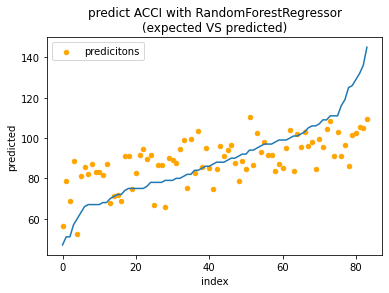

Predict AUTR with RandomForestRegressor :
MeanAbsoluteError:	49.420952380952386
R2 Score         :	-0.11046859758665795



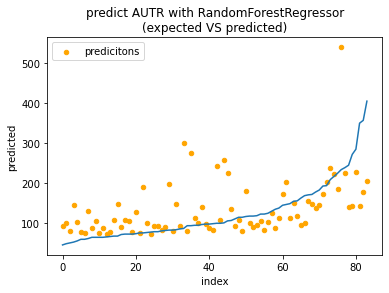

Predict INCN with RandomForestRegressor :
MeanAbsoluteError:	3.2314285714285713
R2 Score         :	0.3734440803426622



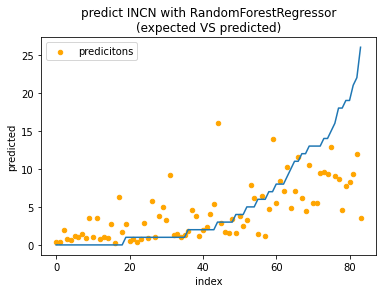

Predict INCU with RandomForestRegressor :
MeanAbsoluteError:	14.58
R2 Score         :	0.3854923579214229



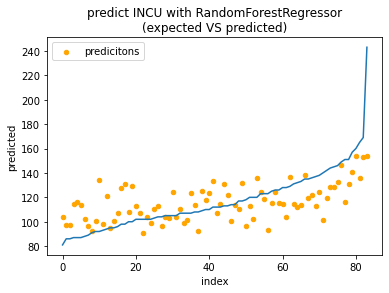

Predict SUAP with RandomForestRegressor :
MeanAbsoluteError:	72.27000000000001
R2 Score         :	0.30633547684971285



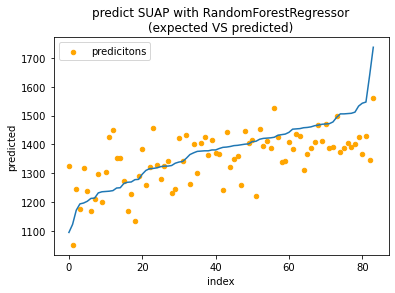

Predict ope_total with RandomForestRegressor :
MeanAbsoluteError:	98.29559523809523
R2 Score         :	0.3175657225835635



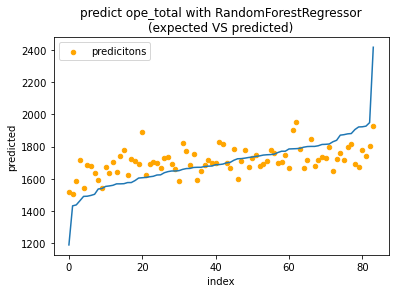

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def do_random_forest(target_feature='SUAP', train_test=None):

    model_random_forest = StandardScaler()

    # All columns except yearweek and all interventions numbers
    features = df.columns[7:]
    to_predict = target_feature

    X = df[features]
    y = df[to_predict]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    X_train = model_random_forest.fit_transform(X_train)
    X_test = model_random_forest.transform(X_test)

    model = RandomForestRegressor(random_state=1)
    model.fit(X_train, y_train)

    return model, {'train_X': X_train, 'val_X': X_test, 'train_y': y_train, 'val_y': y_test}


forest_results = {}
for target in target_features: # loop through 'ACCI', 'AUTR', 'INCN', 'INCU', 'SUAP', 'ope_total'
    forest_results[target] = {'model': None, 'train_test': {}}
    forest_results[target]['model'], forest_results[target]['train_test'] = do_random_forest(target)

# display results
for target in forest_results:
    display_mae_r2(
        model=forest_results[target]['model'],
        train_test=forest_results[target]['train_test'],
    )
    plot_expected_vs_predicted(
        model=forest_results[target]['model'],
        train_test=forest_results[target]['train_test'],
    )

### **- Manually tuned MLP with Keras' Sequential Model**

For earch target features, we preprocessed the data using a Standard Scaler and a Normalizer and fed it to a sequential model composed of 4 Dense layers using ReLU activation.

The predictions weren't better than with the RandomForestRegressor.

In [14]:
from sklearn.preprocessing import Normalizer, StandardScaler, QuantileTransformer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.losses import MeanSquaredError, MeanAbsoluteError
from keras.layers.core import Dropout
from keras import metrics

##### FIX for "Blas GEMM launch failed" Error
##### see https://stackoverflow.com/a/60699372/12182226
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
#####


def do_MLP(target_feature='SUAP', verbose=0):
    # All columns except yearweek and all interventions numbers
    features = df.columns[7:]
    X = df[features]
    y = df[target_feature]
    
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20)

    #standard scaler
    std_scaler = StandardScaler().fit(X) # fit doesn't affect the data
    train_X = pd.DataFrame(std_scaler.transform(train_X), columns=features)
    val_X = pd.DataFrame(std_scaler.transform(val_X), columns=features)

    # normalize
    normalizer = Normalizer().fit(X) # fit doesn't affect the data
    train_X = pd.DataFrame(normalizer.transform(train_X), columns=features)
    val_X = pd.DataFrame(normalizer.transform(val_X), columns=features)

    model = Sequential()

    #1024, 512, 1
    #4096, 1024, 512, 1

    model.add(Dense(4096, activation='relu', kernel_initializer='random_normal', input_dim=62)) 
    model.add(Dense(1024, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(1)) #relu, elu, softplus, selu ...

    adam_opt = Adam(learning_rate=0.005) # https://keras.io/api/optimizers/

    model.compile(optimizer=adam_opt, loss="mae", metrics=[metrics.mean_absolute_error])
    model.fit(train_X, train_y, epochs=200 , batch_size=10, verbose=verbose) # 200, 10
    
    return model, {'train_X': train_X, 'val_X': val_X, 'train_y': train_y, 'val_y': val_y}

In [19]:
mlp_results = {}
for target in target_features: # loop through 'ACCI', 'AUTR', 'INCN', 'INCU', 'SUAP', 'ope_total'
    mlp_results[target] = {'model': None, 'train_test': {}}
    mlp_results[target]['model'], mlp_results[target]['train_test'] = do_MLP(target_feature=target, verbose=0)
    print(f'{target} done ...')

ACCI done ...
AUTR done ...
INCN done ...
INCU done ...
SUAP done ...
ope_total done ...


Predict ACCI with MLP :
MeanAbsoluteError:	15.75933465503511
R2 Score         :	-0.35499556562653245



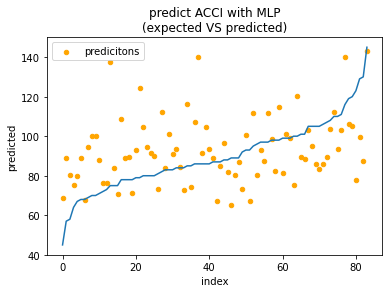

Predict AUTR with MLP :
MeanAbsoluteError:	108.65491957891555
R2 Score         :	0.0972987196257622



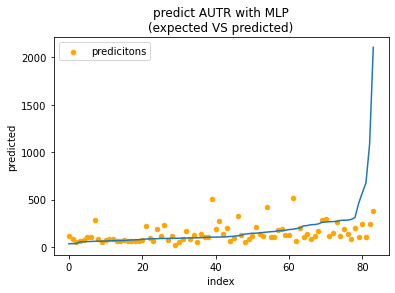

Predict INCN with MLP :
MeanAbsoluteError:	4.49543386023669
R2 Score         :	-0.4166990616100872



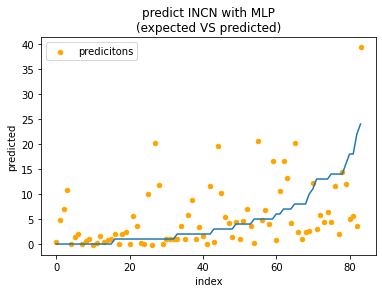

Predict INCU with MLP :
MeanAbsoluteError:	24.424496332804363
R2 Score         :	-0.7354308044897842



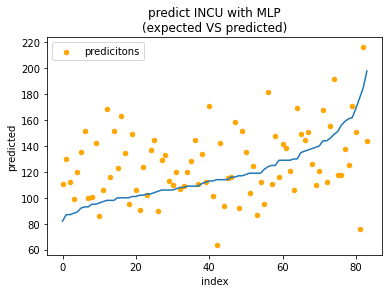

Predict SUAP with MLP :
MeanAbsoluteError:	90.53289940243675
R2 Score         :	0.3646436306412547



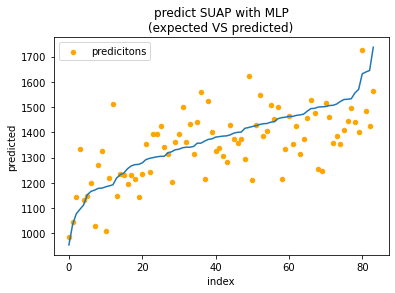

Predict ope_total with MLP :
MeanAbsoluteError:	118.01302955264137
R2 Score         :	0.1492647055640981



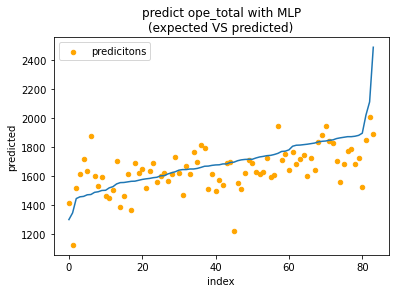

In [20]:
# display results
for target in mlp_results:
    display_mae_r2(
        model=mlp_results[target]['model'],
        train_test=mlp_results[target]['train_test'],
    )
    plot_expected_vs_predicted(
        model=mlp_results[target]['model'],
        train_test=mlp_results[target]['train_test'],
    )

### **- Building multiple models and sum their predictions** 

We trained models to predict ACCI, AUTR, INCN, INCU and SUAP, then summed up their predictions to obtain a prediciton of ope_total.

This approach didn't gave really good results compared to the others.

Predict ope_total with MLP :
MeanAbsoluteError:	232.06303042457216
R2 Score         :	-1.3295758070766732



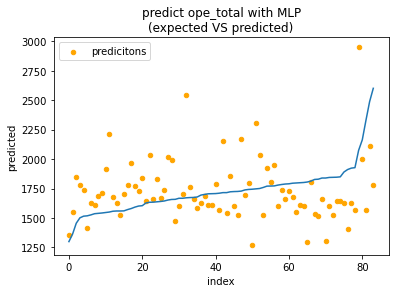

In [8]:
import numpy as np

predictions = []
for target in ['ACCI', 'AUTR', 'INCN', 'INCU', 'SUAP']:
    model = mlp_results[target]['model']
    train_test = mlp_results[target]['train_test']

    val_predictions = model.predict(train_test['val_X'])
    predictions.append(val_predictions)


total = predictions[0]

for i in range (1, len(predictions)):
    total = np.add(total, predictions[i])

display_mae_r2(
    model=mlp_results['ope_total']['model'],
    train_test=mlp_results['ope_total']['train_test'],
    force_predicted=total,
)
plot_expected_vs_predicted(
    model=mlp_results['ope_total']['model'],
    train_test=mlp_results['ope_total']['train_test'],
    force_predicted=total,
)

### **- Automatically tuned MLP with AutoKeras**

Finally, we returned to the "Keras + MLP" approach but while using AutoKeras this time. When using a MLP, fiding the good amount of layers and fine tuning their parameters can be hard. AutoKeras is a Python library performing Automated Machine Learning. It provides a way to automatically find top performing models and some of the best hyper-parameters that pairs with these models.

After running a model search with AutoKeras, it returns a keras model we can use for predictions.

The predictions of this model were really good on the training data, sometimes reaching a Mean Absolute Error of 80 when predicting ope_total. On the other hand, the predicitons on the validation data weren't that accurate (MAE=90).
The model outputed by AutoKeras gives better predicitons than the model we manually tuned ourselves.

In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # disable tensorflow warnings about float64/32 casting
import tensorflow as tf
from autokeras import StructuredDataRegressor
from sklearn.preprocessing import Normalizer, StandardScaler, QuantileTransformer

##### FIX for "Blas GEMM launch failed" Error
##### see https://stackoverflow.com/a/60699372/12182226
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
#####


def autok():

    # All columns except yearweek and all interventions numbers
    features = df.columns[7:]
    X = df[features]
    y = df['ope_total']
    
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20)

    #standard scaler
    std_scaler = StandardScaler().fit(X) # fit doesn't affect the data
    train_X = pd.DataFrame(std_scaler.transform(train_X), columns=features)
    val_X = pd.DataFrame(std_scaler.transform(val_X), columns=features)

    # normalize
    normalizer = Normalizer().fit(X) # fit doesn't affect the data
    train_X = pd.DataFrame(normalizer.transform(train_X), columns=features)
    val_X = pd.DataFrame(normalizer.transform(val_X), columns=features)

    reg = StructuredDataRegressor(max_trials=50, overwrite=False, loss="mean_absolute_error")

    # Feed the structured data regressor with training data.
    reg.fit(train_X, train_y)
    # Predict with the best model.
    predicted_y = reg.predict(val_X)
    # Evaluate the best model with testing data.
    return reg, {'train_X': train_X, 'val_X': val_X, 'train_y': train_y, 'val_y': val_y}

ak_regressor, ak_train_test = autok()

INFO:tensorflow:Reloading Oracle from existing project .\structured_data_regressor\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_regressor\tuner0.json

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Oracle triggered exit

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To 

In [10]:
ak_mae_train, _ = ak_regressor.evaluate(ak_train_test['train_X'], ak_train_test['train_y'])
print(f'MAE using autokeras : {ak_mae_train} (ON train)')

ak_mae_test, _ = ak_regressor.evaluate(ak_train_test['val_X'], ak_train_test['val_y'])
print(f'MAE using autokeras : {ak_mae_test} (ON TEST)')

11/11 [==============================] - 0s 3ms/step - loss: 81.9411 - mean_squared_error: 26855.4180
MAE using autokeras : 81.94112396240234 (ON train)
3/3 [==============================] - 0s 2ms/step - loss: 92.1307 - mean_squared_error: 18339.9570
MAE using autokeras : 92.13067626953125 (ON TEST)


In [11]:
ak_model = ak_regressor.export_model()
ak_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 62)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 62)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               32256     
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

Predict ope_total with Functional :
MeanAbsoluteError:	92.13068062918526
R2 Score         :	0.3258574711485579



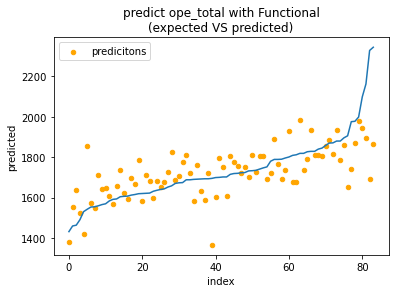

In [12]:
display_mae_r2(
    model=ak_model,
    train_test=ak_train_test,
)
plot_expected_vs_predicted(
    model=ak_model,
    train_test=ak_train_test,
)

## 1.6. Bias and comments about the data used and the results

Datasets are not always concerning the Essone departement only. In one hand, some are on a city scale and on the other hand, some cover an entire region. It is not a big problem but it introduces a bias in our predictions.

We could also argue about the fact that the predictions would be more accurate with more data and more attributes.

**More data :**  
We used data from 2010 to 2017 and, at the rate of one line for each week passed, our merged dataset only contains 416 rows. For some simple predictions problems, this amount of rows would be enough, but when the problem is a harder one, a model sometimes need multiple thousand of rows to be able to do good predictions. In our case, there is not any obvious and useful correlation between attributes, and more rows could help the precision of the predicitons.

**More attributes :**  
Does weather, the incidence rate of three medical conditions and vacation periods are enough to predict firefighters interventions ? It is a good start, but there is probably more than that. Elements unrelated to these attributes could also influence greatly the intervention count ... not to mention the part of randomness.


**Using days instead of weeks:**
As stated before, some days have a specific meaning (new year's eve, national day ...), but the SDIS91 operations data was in a weekly form. Using a dataset with daily details about the operations could lead to more precise results.